In [1]:
import numpy as np
import matplotlib.pyplot as plt

import qnmfits

In [ ]:
# Make a 305-like ringdown signal with the fundamental mode only
times = np.linspace(0,100,500)

amplitudes = [(1-1j)]
frequencies = qnmfits.qnm.omega_list([(2,2,0,1)], 0.7)

data = qnmfits.ringdown(times, 0, amplitudes, frequencies)

fig, ax = plt.subplots(dpi=180)
ax.plot(times, np.real(data))
ax.plot(times, np.imag(data))

ax.set_xlabel('$t$')
_ = ax.set_ylabel('$h$')

In [ ]:
# Performing a fit with t0=0, we recover the injected complex amplitude:
best_fit = qnmfits.ringdown_fit(
    times,
    data,
    modes=[(2,2,0,1)],
    Mf=1,
    chif=0.7,
    t0=0
    )

print(f"Mismatch = {best_fit['mismatch']}")
print(f"Measured amplitude = {best_fit['C']}")

In [ ]:
# But this changes for later start times:
best_fit = qnmfits.ringdown_fit(
    times,
    data,
    modes=[(2,2,0,1)],
    Mf=1,
    chif=0.7,
    t0=10
    )

print(f"Mismatch = {best_fit['mismatch']}")
print(f"Measured amplitude = {best_fit['C']}")

Both the absolute value and phase of the complex amplitude change when we go to a later start time. At the time of writing the code only reports the value of the amplitude *at the chosen value of $t_0$*, so of course its absolute value has decayed. We can understand the decay from the damping time of the QNM frequency:

In [ ]:
# Repeat for a series of start times
t0_array = np.linspace(0,50,250)

mm_list = []
amp_list = []

for t0 in t0_array:
    
    best_fit = qnmfits.ringdown_fit(
        times,
        data,
        modes=[(2,2,0,1)],
        Mf=1,
        chif=0.7,
        t0=t0
        )
    
    mm_list.append(best_fit['mismatch'])
    amp_list.append(best_fit['C'])
    
mm_array = np.array(mm_list)
amp_array = np.array(amp_list)[:,0]

In [ ]:
# We see the absolute value of the amplitude behaves as expected
fig, ax = plt.subplots(dpi=180)

ax.plot(t0_array, abs(amp_array), label='Measured amplitude')

# The expected amplitude decay from the QNM frequency
tau = -1/np.imag(frequencies[0])
expected_amp = abs(amp_array[0])*np.exp(-t0_array/tau)

ax.plot(t0_array, expected_amp, c='k', ls='--', label='Expected decay')

ax.set_xlabel('$t_0$')
ax.set_ylabel('$|C|$')

_ = ax.legend()

In [ ]:
# And in the complex plane the amplitude spirals - the measured phase is
# always changing
fig, ax = plt.subplots(figsize=(6,6), dpi=180)
ax.set_aspect('equal')

ax.plot(np.real(amp_array), np.imag(amp_array))

ax.set_xlabel('$\mathrm{Re}[C]$')
ax.set_ylabel('$\mathrm{Im}[C]$')

The reason the measured phase is changing is because our ringdown model has the form

\begin{align}
h &= Ce^{-i \omega (t-t_0)} \\
&= Ce^{-i \omega t - i \omega t_0} \\
&= Ce^{-i \omega t_0} e^{-i \omega t} \\
&= C' e^{-i \omega t},
\end{align}

i.e. when we change $t_0$, we introduce a phase shift which gets absorbed into the measured amplitude. We can recover the value of $C$ (as defined at $t=0$), by simply calculating

$$ C = C' e^{i \omega t_0}. $$

In [ ]:
# Correcting the phase change only:
phase_corrected = amp_array*np.exp(1j*np.real(frequencies[0]*t0_array))

# Correcting for the phase and amplitude decay:
amp_phase_corrected = amp_array*np.exp(1j*frequencies[0]*t0_array)

fig, ax = plt.subplots(figsize=(6,6), dpi=180)
ax.set_aspect('equal')

ax.plot(np.real(amp_array), np.imag(amp_array), ls='--', alpha=0.5, label='Default')
ax.plot(np.real(phase_corrected), np.imag(phase_corrected), c='C0', label='Phase corrected')
ax.plot(np.real(amp_phase_corrected), np.imag(amp_phase_corrected), marker='o', c='C1', label='Amplitude and phase corrected')

ax.axvline(0, c='k', alpha=0.1)
ax.axhline(0, c='k', alpha=0.1)

ax.set_xlabel('$\mathrm{Re}[C]$')
ax.set_ylabel('$\mathrm{Im}[C]$')

_ = ax.legend()

In [2]:
sim = qnmfits.SXS(ID=305, zero_time=(2,2))

/Users/eliot/Documents/Research/Ringdown/qnmfits/.conda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Skipping download from 'https://data.black-holes.org/catalog.json' because local file is newer
Found the following files to load from the SXS catalog:
    SXS:BBH:0305v5/Lev6/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0305v5/Lev6/rhOverM_Asymptotic_GeometricUnits_CoM.h5


In [11]:
N = 7
modes = [(2,2,n,1) for n in range(N+1)] #  + [(3,2,0,1), (3,2,1,0), (2,-2,0,-1), (2,1,0,1), (3,3,0,1), (4,4,0,1)]
frequencies = qnmfits.qnm.omega_list(modes, sim.chif_mag)

t0_array = np.linspace(0,50,250)

mm_list = []
amp_list = []

for t0 in t0_array:
    
    best_fit = qnmfits.ringdown_fit(
        sim.times,
        sim.h[2,2]-sim.h[2,2][-1],
        modes=modes,
        Mf=1,
        chif=sim.chif_mag,
        t0=t0
        )
    
    mm_list.append(best_fit['mismatch'])
    amp_list.append(best_fit['C'])
    
mm_array = np.array(mm_list)
amp_array = np.array(amp_list)

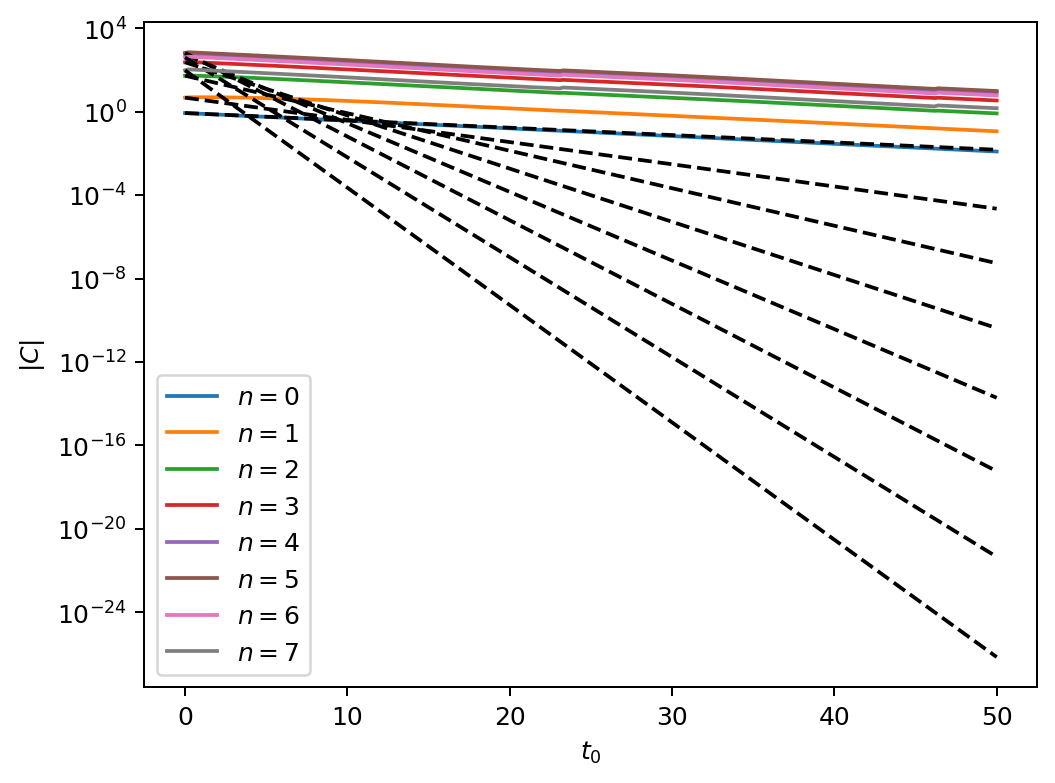

In [12]:
fig, ax = plt.subplots(dpi=180)
ax.set_yscale('log')

for n in range(N+1):

    ax.plot(t0_array, abs(amp_array[:,n]), label=f'$n={n}$')

    # The expected amplitude decay from the QNM frequency
    tau = -1/np.imag(frequencies[n])
    expected_amp = abs(amp_array[:,n][0])*np.exp(-t0_array/tau)

    ax.plot(t0_array, expected_amp, c='k', ls='--')

ax.set_xlabel('$t_0$')
ax.set_ylabel('$|C|$')

_ = ax.legend()

Mismatch = 2.947389006191514e-07


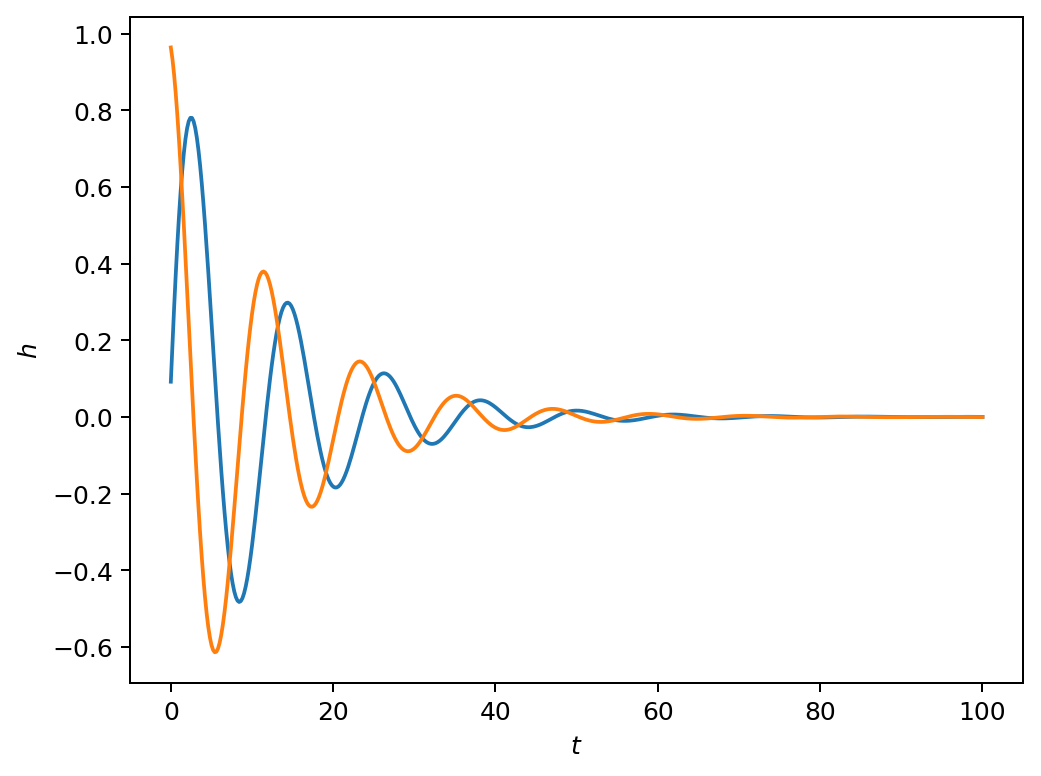

In [13]:
best_fit = qnmfits.ringdown_fit(
    sim.times,
    sim.h[2,2]-sim.h[2,2][-1],
    modes,
    Mf=sim.Mf,
    chif=sim.chif_mag,
    t0=0
)

print(f"Mismatch = {best_fit['mismatch']}")

times = np.linspace(0,100,500)

amplitudes_data = best_fit['C'].copy()[:1]
frequencies_data = qnmfits.qnm.omega_list(modes, sim.chif_mag)[:1]

data = qnmfits.ringdown(times, 0, amplitudes_data, frequencies_data)

fig, ax = plt.subplots(dpi=180)
ax.plot(times, np.real(data))
ax.plot(times, np.imag(data))

ax.set_xlabel('$t$')
_ = ax.set_ylabel('$h$')

In [14]:
best_fit = qnmfits.ringdown_fit(
    times,
    data,
    modes=modes,
    Mf=1,
    chif=sim.chif_mag,
    t0=0
    )

print(f"Mismatch = {best_fit['mismatch']}")
print(f"Measured amplitude = {best_fit['C']}")

Mismatch = -2.220446049250313e-16
Measured amplitude = [ 9.19283794e-02+9.63899962e-01j  1.55418422e-14-6.67571585e-15j
 -2.08335044e-13+1.49021356e-13j  1.10639922e-12-1.22731320e-12j
 -2.38674914e-12+4.60251289e-12j  2.04438881e-12-7.63514324e-12j
 -6.16990984e-13+5.80380960e-12j  4.58500025e-14-1.68853997e-12j]


In [ ]:
fig, ax = plt.subplots()

for n in range(N+1):
    ax.plot(n, abs(amplitudes[n]-best_fit['C'][n]), marker='o')

In [15]:
# Repeat for a series of start times
t0_array = np.linspace(0,50,250)

mm_list = []
amp_list = []

for t0 in t0_array:
    
    best_fit = qnmfits.ringdown_fit(
        times,
        data, # + sim.h[8,1][-500:],
        modes=modes,
        Mf=1,
        chif=sim.chif_mag,
        t0=t0
        )
    
    mm_list.append(best_fit['mismatch'])
    amp_list.append(best_fit['C'])
    
mm_array = np.array(mm_list)
amp_array = np.array(amp_list)

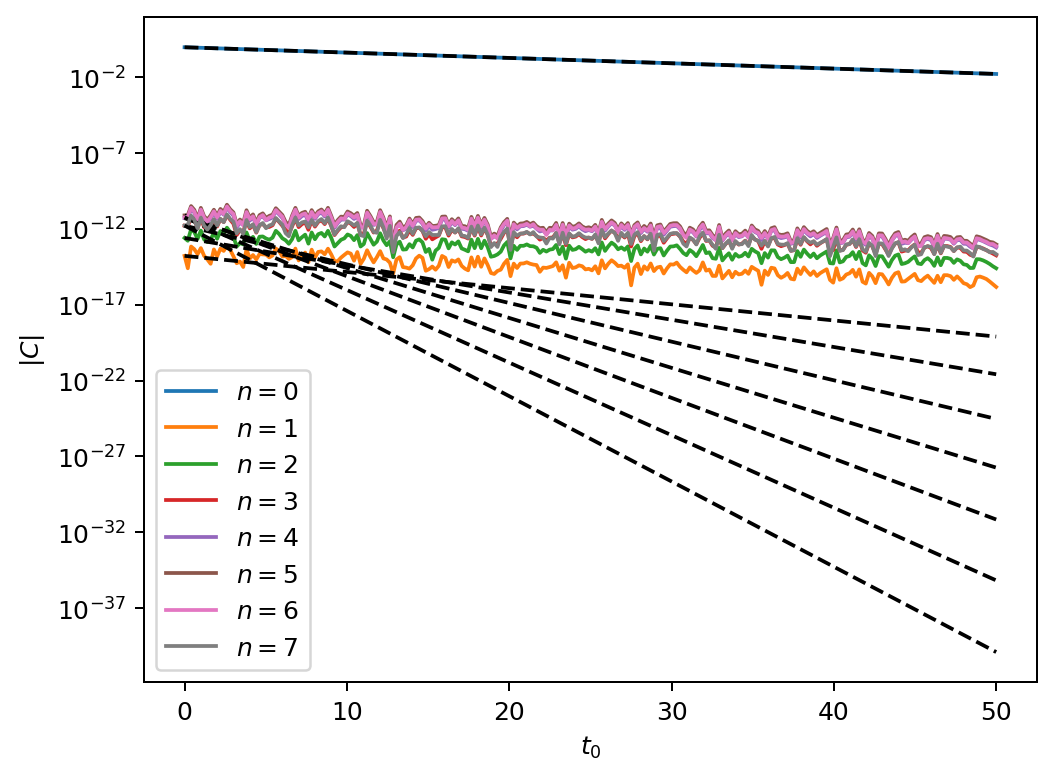

In [16]:
fig, ax = plt.subplots(dpi=180)
ax.set_yscale('log')

for n in range(N+1):

    ax.plot(t0_array, abs(amp_array[:,n]), label=f'$n={n}$')

    # The expected amplitude decay from the QNM frequency
    tau = -1/np.imag(frequencies[n])
    expected_amp = abs(amp_array[:,n][0])*np.exp(-t0_array/tau)

    ax.plot(t0_array, expected_amp, c='k', ls='--')

ax.set_xlabel('$t_0$')
ax.set_ylabel('$|C|$')

_ = ax.legend()

In [ ]:
fig, ax = plt.subplots()

ax.plot(sim.times[-2000:], sim.h[8,0][-2000:])